In [1]:
from scipy.stats import median_abs_deviation

import sys
sys.path.insert(0, '/home/workspace/mm_analysis')
sys.path.insert(0, '/home/workspace/')

from py_util import *
from utilities import *

hdir = '/home/workspace'
wdir = hdir + "/mm_analysis/EXP-01244"
objdir = wdir + "/processing/objects/"
degdir = wdir + "/deg_list/"

adata = sc.read_h5ad(objdir + "ds_processed_all_organoids_adata.h5ad")

adata_type = "All Organoids (downsampled)"

target = 'mono_'
labels = pd.read_csv(hdir + "/mm_analysis/bm_cell_label_reference.csv").iloc[:, 1:5]
labels = labels[labels.iloc[:,1].str.contains(target)]

exclude = ['CD16', 'GKMZ', 'HLA-DRA', 'ILRB2', 'ITGAE', 'STI4', 'VPREB2']

markers = {
    celltype: genes.split(", ")
    for celltype, genes in zip(labels.iloc[:, 1], labels.iloc[:, 2])
}

markers = {
    celltype: [gene for gene in genes if gene not in exclude]
    for celltype, genes in markers.items()
}

markers.keys()

dict_keys(['mono_cd14', 'mono_cd16', 'mono_intermediate'])

Text(0.5, 0.91, 'All Organoids (downsampled): Leiden Resolutions')

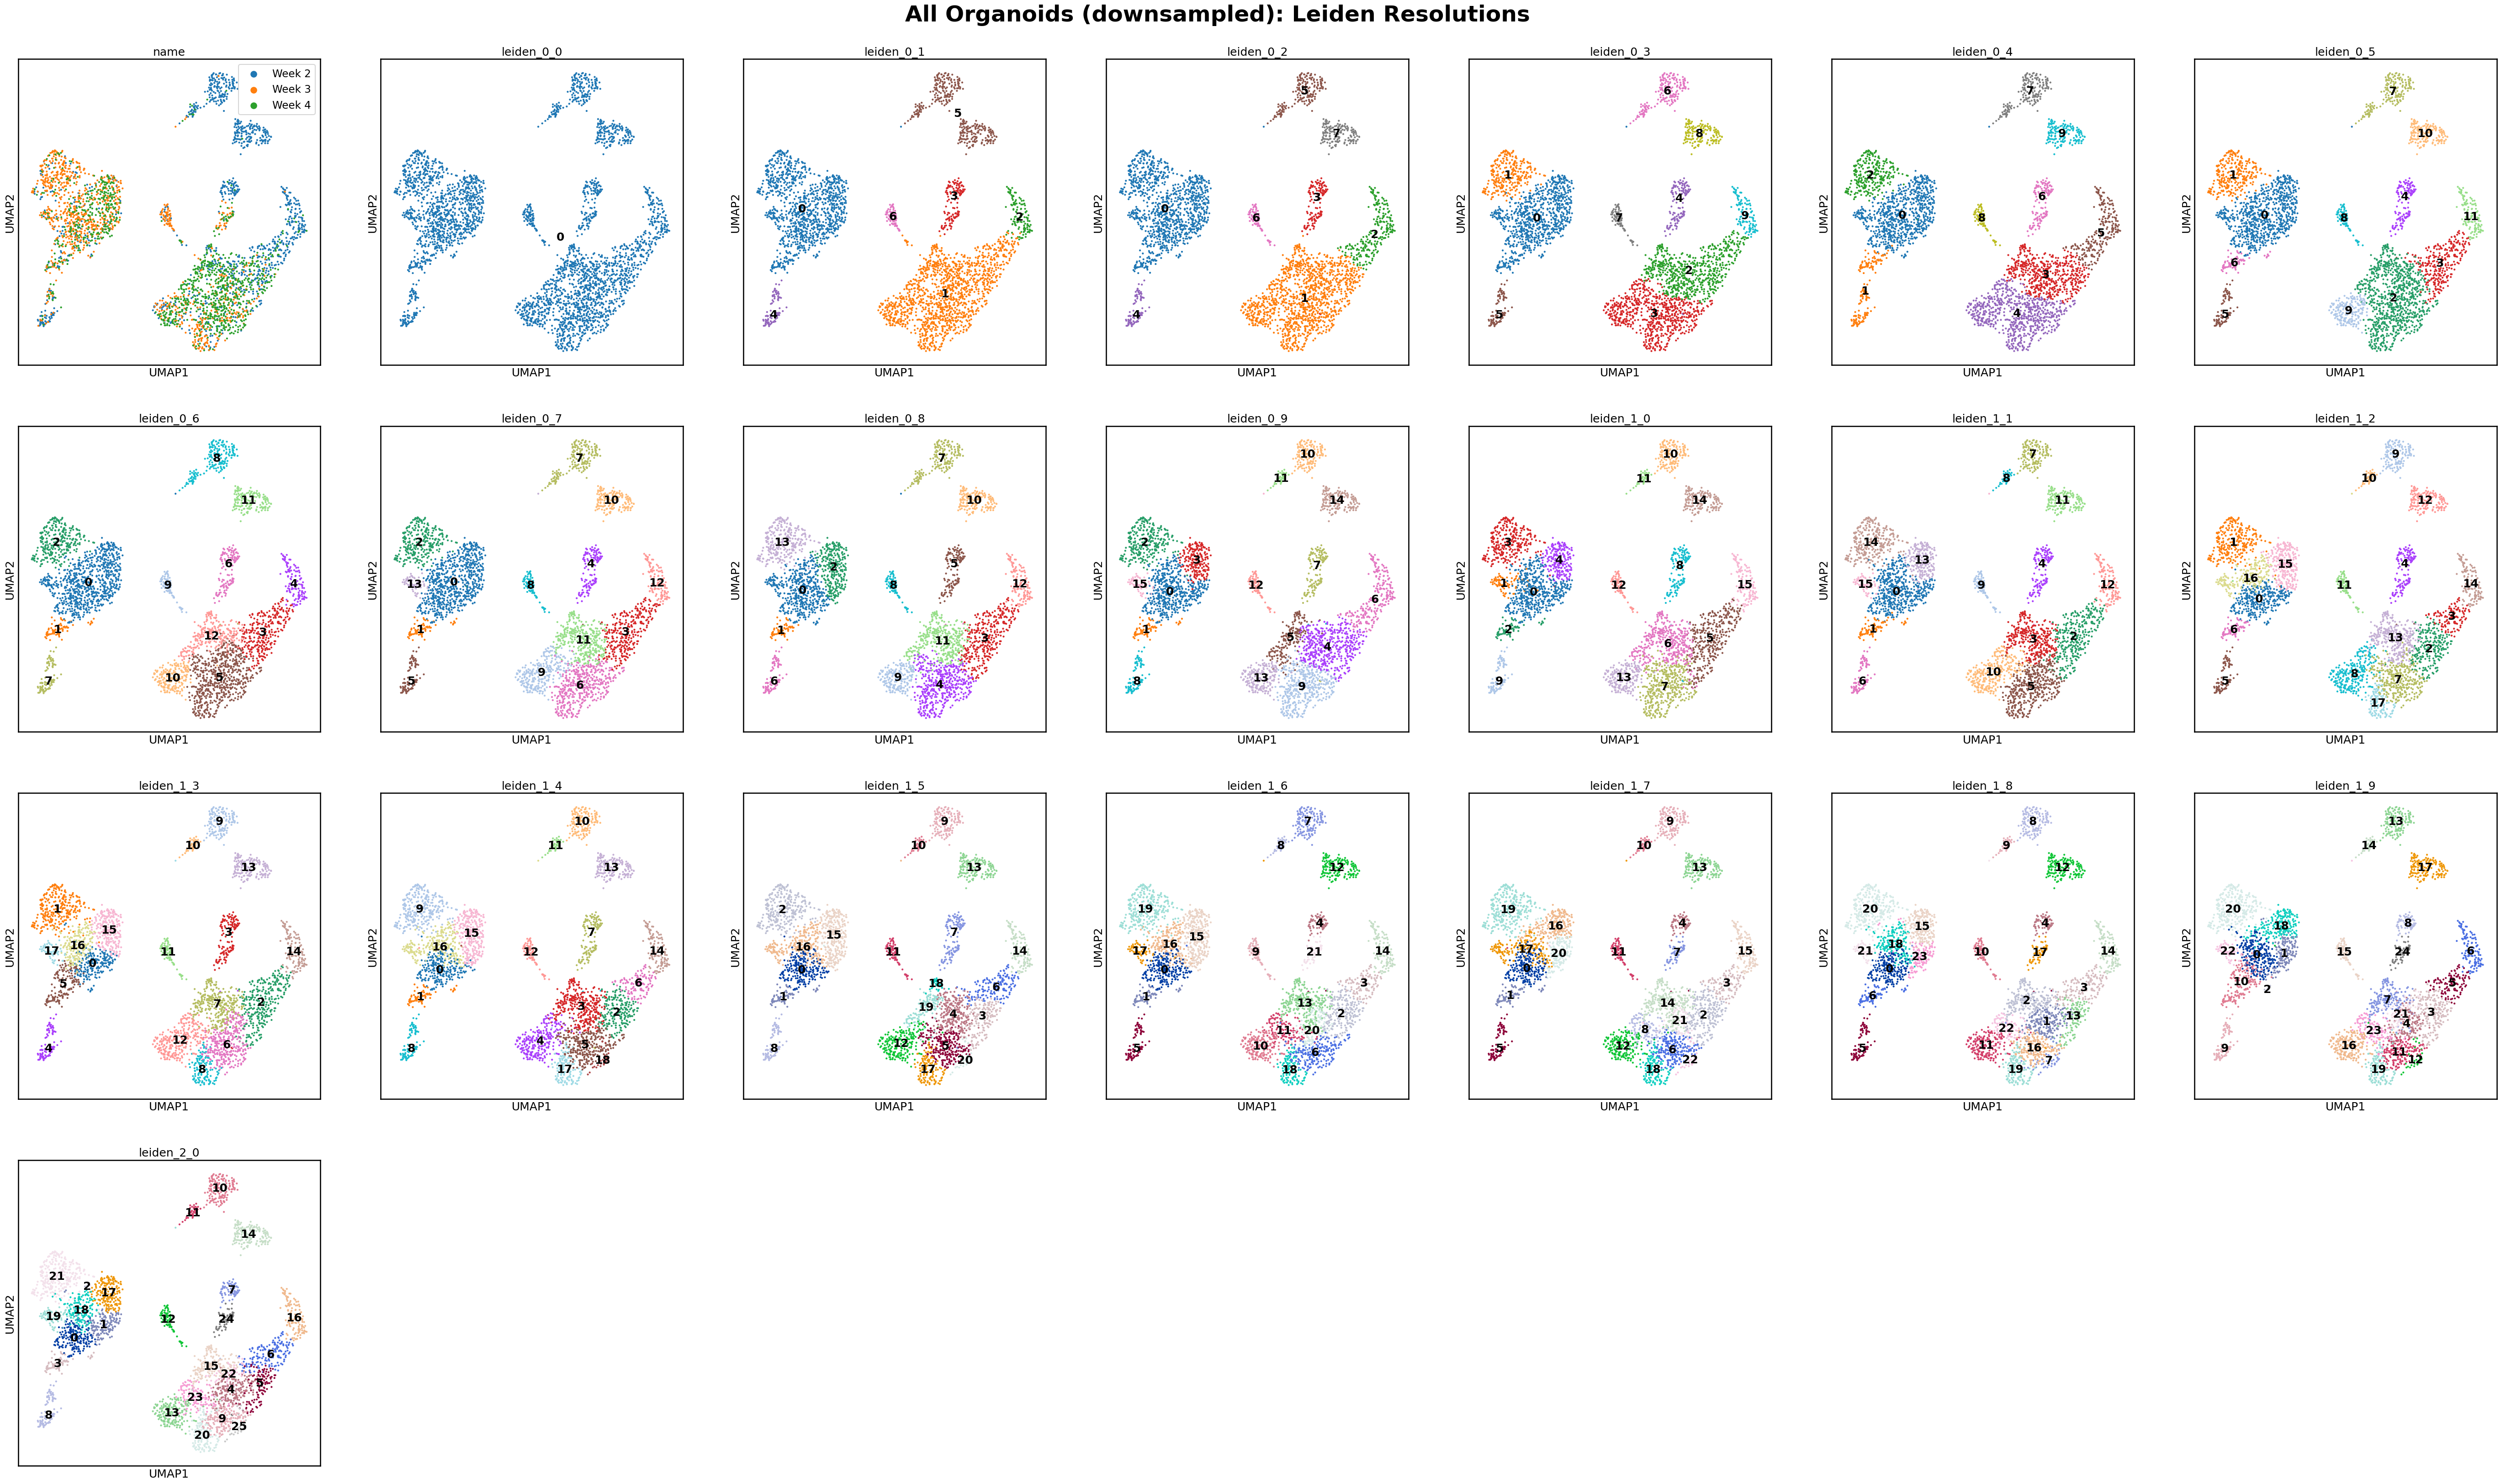

In [2]:
colors = ['name'] + list(adata.uns['leiden_ranges'])

fig, ax, idx = subplot_grids(len(colors), aspect_ratio=2)

for i, color in zip(idx, colors):
    sc.pl.umap(
        adata,
        color=color,
        show=False,
        ax=ax[i],
        legend_loc='best' if i == idx[0] else 'on data'
    )

fig.suptitle(f'{adata_type}: Leiden Resolutions', y=.91, fontweight='bold', fontsize=35)

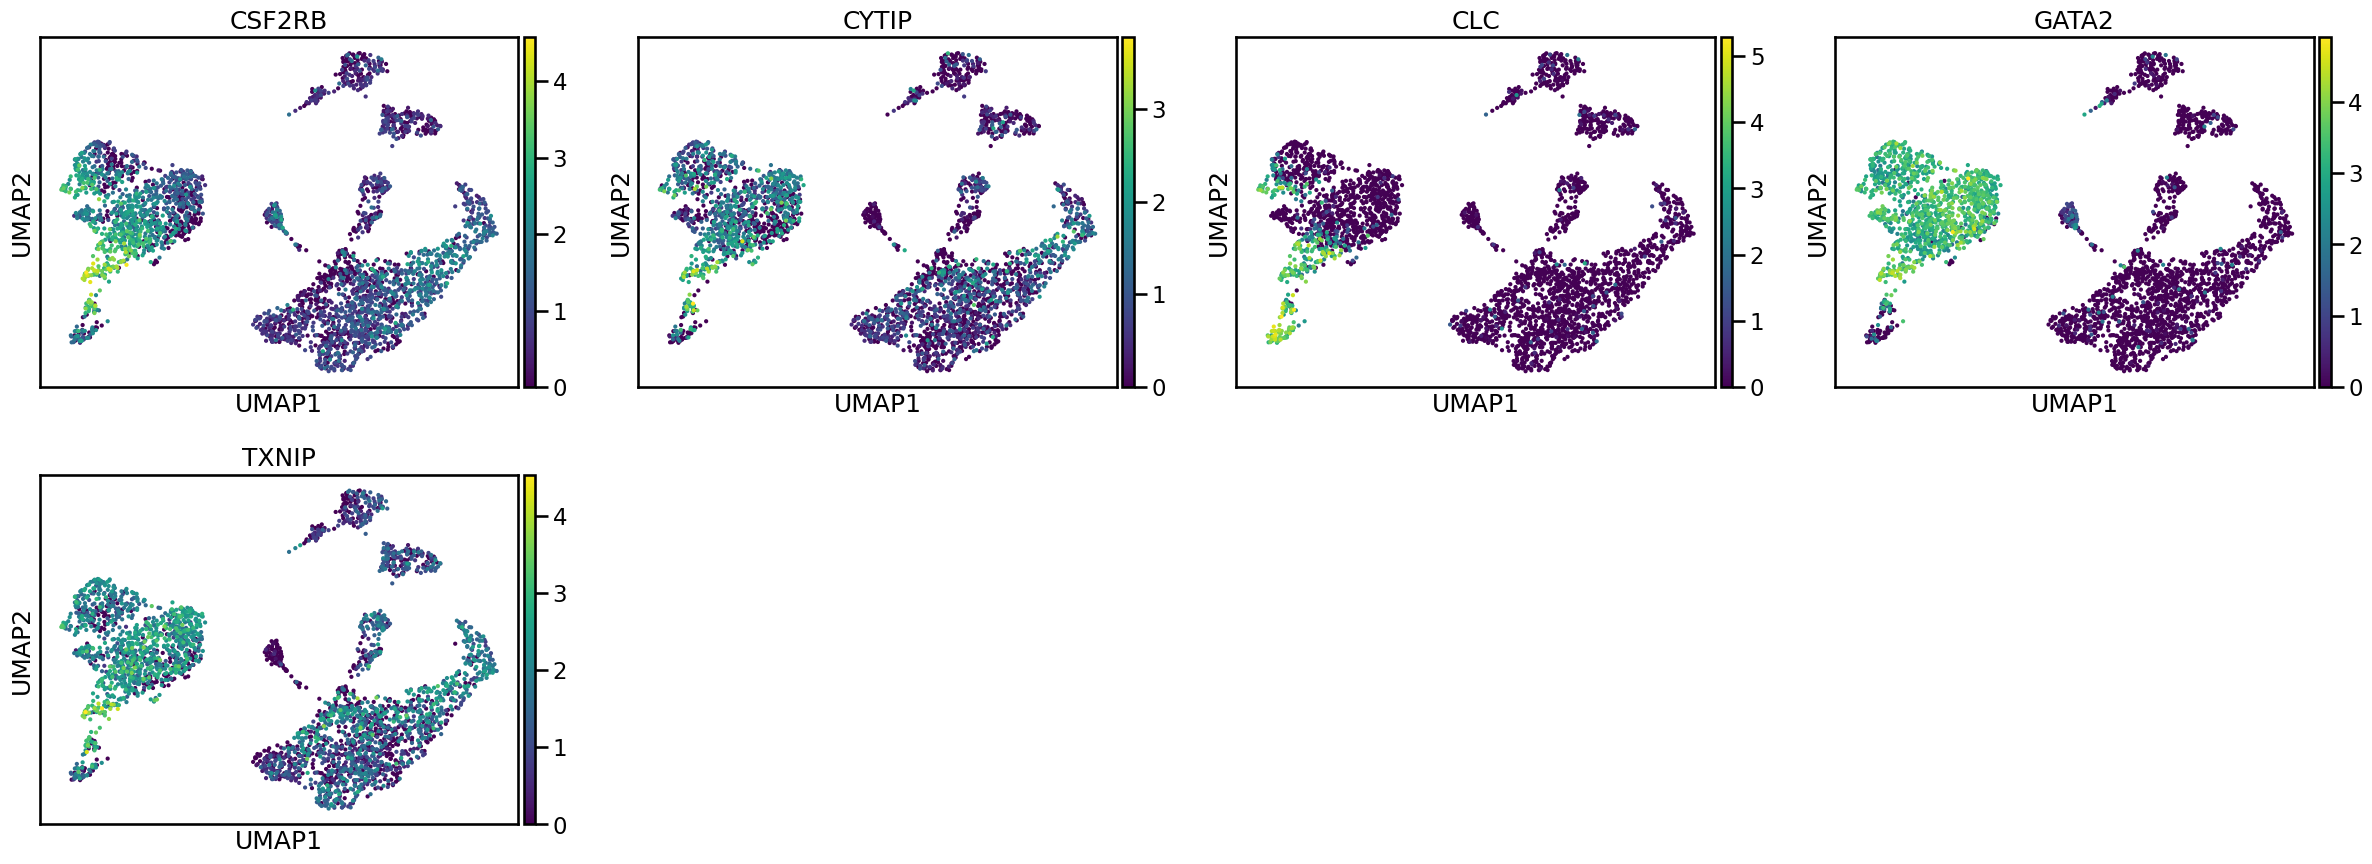

In [8]:
sc.pl.umap(
    adata,
    color=['CSF2RB', 'CYTIP', 'CLC', 'GATA2', 'TXNIP']
)

In [7]:
l1 = {cluster: cluster for cluster in sorted(adata.obs['leiden'].unique(), key=int)}



{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 '9': '9',
 '10': '10',
 '11': '11',
 '12': '12',
 '13': '13',
 '14': '14',
 '15': '15'}